In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
wine_data_path = "./data/winemag-data-130k-v2.csv" 

In [3]:
missing_values = ["n/a", "na", "--", "false"]
raw_wine_data = pd.read_csv(wine_data_path, na_values = missing_values)

In [4]:
filtered_wine_data = raw_wine_data[['description', 'points', 'price']]
clean_wine_data = filtered_wine_data.dropna()

In [5]:
clean_wine_data['description_length'] = clean_wine_data['description'].apply(lambda x: len(str(x).split(" ")))
clean_wine_data['description_sentiment'] = clean_wine_data['description'].apply(lambda x: TextBlob(x).sentiment[0] + 1)

clean_wine_data = clean_wine_data.loc[clean_wine_data['description_length'] > 6]

/home/joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
clean_wine_data.head()

,description,points,price,description_length,description_sentiment
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,39,1.220000
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,28,1.025000
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,33,1.166667
4,"Much like the regular bottling from 2012, this...",87,65.0,41,1.306667
5,Blackberry and raspberry aromas show a typical...,87,15.0,42,1.026667


In [14]:
length_means = clean_wine_data['points'].groupby(clean_wine_data['description_length']).mean()
points_means_l = clean_wine_data['description_length'].groupby(clean_wine_data['points']).mean()

length_stds = clean_wine_data['points'].groupby(clean_wine_data['description_length']).std()
points_stds = clean_wine_data['description_length'].groupby(clean_wine_data['points']).std()

sentiment_means = clean_wine_data['points'].groupby(clean_wine_data['description_sentiment']).mean()

clean_wine_data.corr()

,points,price,description_length,description_sentiment
points,1.000000,0.416186,0.532549,0.153667
price,0.416186,1.000000,0.236032,-0.005353
description_length,0.532549,0.236032,1.000000,0.035630
description_sentiment,0.153667,-0.005353,0.035630,1.000000


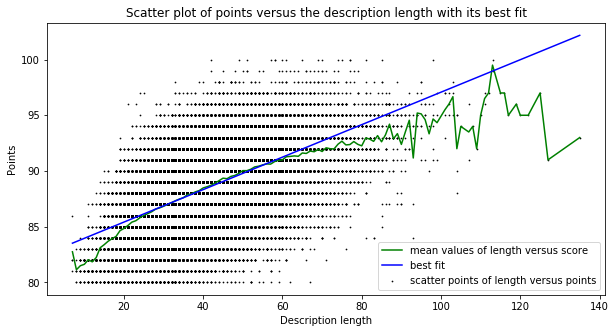

In [15]:
plt.figure(figsize=(10, 5))

xs = clean_wine_data['description_length']
ys = clean_wine_data['points']

# xs_mean = [x for x in range(len(test_point_means))]

plt.scatter(xs, ys, 0.5, c='k', label='scatter points of length versus points')
plt.plot(length_means, c='g', label='mean values of length versus score')
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='b', label='best fit')

# (_, caps, _) = plt.errorbar(
#     xs_mean, length_means, yerr=length_stds, fmt='o', markersize=8, capsize=20)

# for cap in caps:
#     cap.set_markeredgewidth(1)

plt.legend()
plt.xlabel('Description length')
plt.ylabel('Points')
plt.title('Scatter plot of points versus the description length with its best fit')
plt.show()

points
80     26.225316
81     26.873343
82     28.168831
83     31.444560
84     32.659561
85     34.351606
86     35.967728
87     37.658506
88     39.307519
89     41.387496
90     43.150268
91     45.406475
92     47.689888
93     49.914575
94     52.632647
95     55.751778
96     58.462656
97     59.492754
98     62.275362
99     64.500000
100    69.473684
Name: description_length, dtype: float64


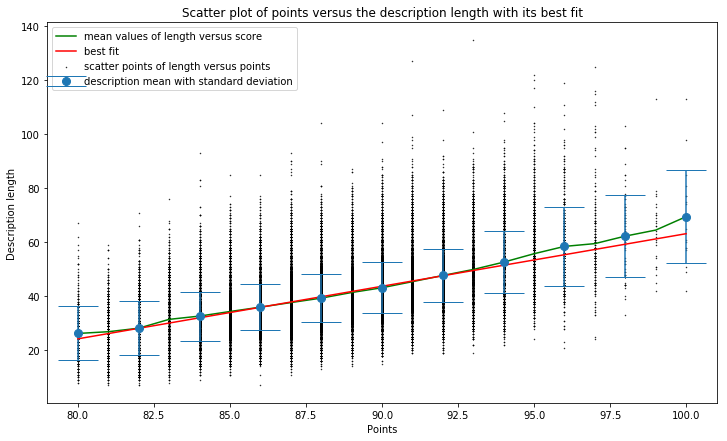

In [38]:
plt.figure(figsize=(12, 7))

xs_points = points_stds.keys()[0::2]
ys_descr = points_means_l[0::2]
err = points_stds[0::2]
print(points_means_l)
(_, caps, _) = plt.errorbar(
    xs_points, ys_descr, yerr=err, fmt='o', markersize=8, capsize=20, label='description mean with standard deviation')

for cap in caps:
    cap.set_markeredgewidth(1)

plt.scatter(ys, xs, 0.2, c='k', label='scatter points of length versus points')
plt.plot(points_means_l, c='g', label='mean values of length versus score')
plt.plot(np.unique(ys), np.poly1d(np.polyfit(ys, xs, 1))(np.unique(ys)), color='r', label='best fit')

plt.legend()
plt.xlabel('Points')
plt.ylabel('Description length')
plt.title('Scatter plot of points versus the description length with its best fit')
  

The points have a 

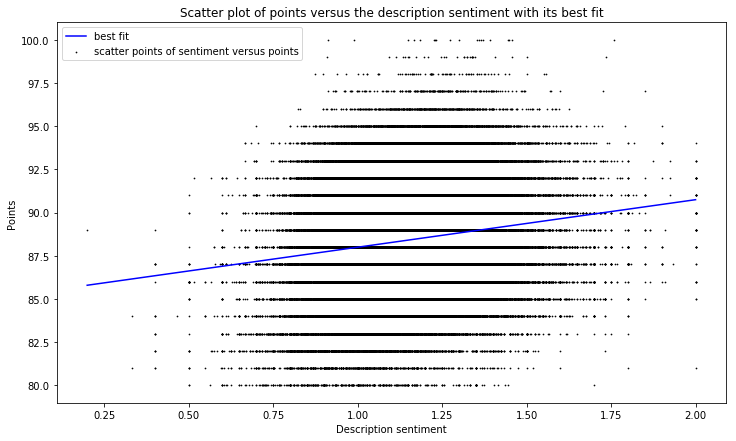

In [10]:
plt.figure(figsize=(12, 7))

xs = clean_wine_data['description_sentiment']
ys = clean_wine_data['points']

plt.scatter(xs, ys, 0.5, c='k', label='scatter points of sentiment versus points')
# plt.plot(sentiment_means, c='g', label='mean values of sentiment versus score')
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='b', label='best fit')


plt.legend()
plt.xlabel('Description sentiment')
plt.ylabel('Points')
plt.title('Scatter plot of points versus the description sentiment with its best fit')
plt.show()